# Add sub cellular distributions.
### 06-27-25 new version from Konstantin with many more TF's
## 08-05-25 Reworked to use the low tau from cell type analysis
## 08-08-25 compared to Scenic

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.patches as mpatches
import seaborn as sns
import random

In [2]:
DATA_IN_DIR = '/hpc/mydata/robert.jones/TFManuscript2GITHubPush/'

## Read TF tau from T. Sapiens

In [4]:
# get tau's from cell type taus for ranking 
TFtaus =  pd.read_csv(DATA_IN_DIR + 'Results/TauValuesCelltype.csv',index_col=0)
TFtaus

,tau
FOXD4L4,0.999868
FIGLA,0.999667
GSX2,0.999634
NEUROG1,0.999582
HOXC12,0.999473
...,...
ZNF644,0.459571
ASH1L,0.450371
YY1,0.434433
BPTF,0.432127


## Read tissue detection file from ProteinTF-Tiss-062525.ipynb

In [5]:
TFproDetTiss = pd.read_csv(DATA_IN_DIR + 'TFproDetTiss.csv', index_col = 0)
print(TFproDetTiss.shape)
print(len(TFproDetTiss.index.unique()))
print(len(TFproDetTiss.Standardized_Tissue.unique()))
TFproDetTiss.Standardized_Tissue.value_counts()

(42180, 10)
699
20


Standardized_Tissue
Skin               6641
Testis             4782
Large_Intestine    3080
Mammary            2998
Lung               2379
Kidney             2270
Stomach            2045
Liver              2045
Spleen             2034
Pancreas           2000
Lymph_Node         1950
Ovary              1574
Small_Intestine    1260
Heart              1026
Muscle             1025
Bone_Marrow        1022
Salivary_Gland     1021
Prostate           1020
Bladder            1005
Fat                1003
Name: count, dtype: int64

In [6]:
TFproDetTiss.location.value_counts()

location
none                              15546
nuclear                           14165
cytoplasmic/membranous             7765
cytoplasmic/membranous,nuclear     4704
Name: count, dtype: int64

In [7]:
TFproDetTiss.staining.value_counts()

staining
not detected    17794
medium          11451
low              6542
high             6387
Name: count, dtype: int64

In [8]:
print('tested TFs', len(TFproDetTiss.index.unique()))

tested TFs 699


In [9]:
detected = TFproDetTiss[TFproDetTiss.staining != 'not detected']
print('detected TFs in at least one tissue:', len(detected.index.unique()))
detected.index.unique()

detected TFs in at least one tissue: 693


Index(['NFYA', 'HOXA11', 'ZFX', 'YBX2', 'ZNF263', 'GTF2IRD1', 'PAX6', 'TFAP2B',
       'NFIX', 'ZNF207',
       ...
       'ZNF865', 'GTF2I', 'ZNF234', 'ZNF224', 'HSFX2', 'ZBTB8B', 'LHX1',
       'HNF1B', 'DACH1', 'HOMEZ'],
      dtype='object', name='gene_name', length=693)

In [10]:
nuclearloc = detected[detected.location.isin(['nuclear' , 'cytoplasmic/membranous,nuclear'])]
print('nuclear location TFs in at lease one tissue', len(nuclearloc.index.unique()))

nuclear location TFs in at lease one tissue 623


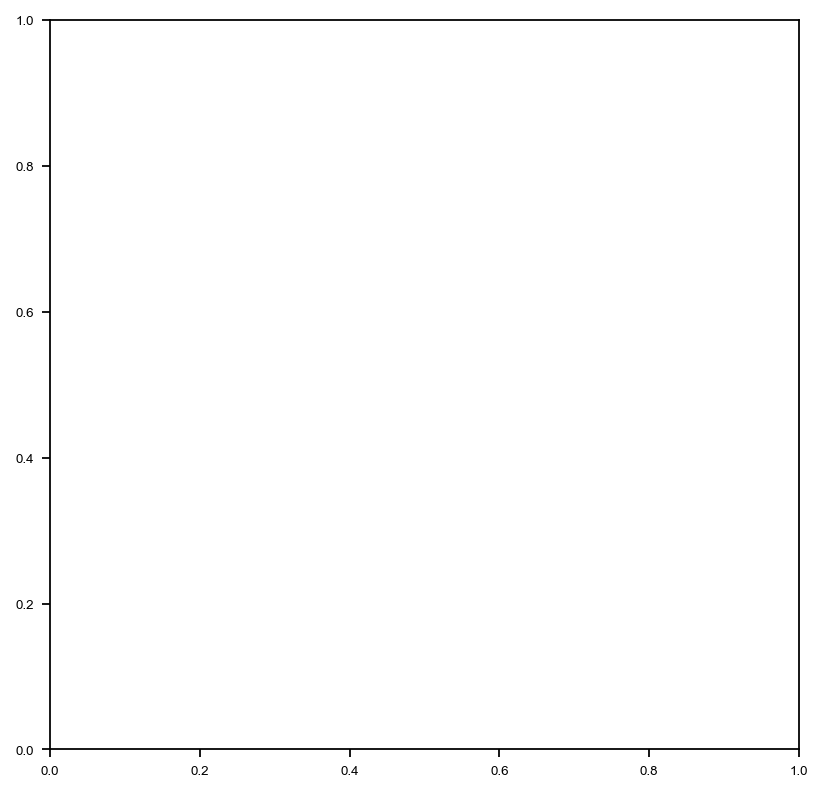

In [11]:
# Madhav style charts

sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, 
                              facecolor='white', frameon=True, 
                              figsize=(3.0, 2.0), vector_friendly = False, 
                              transparent=True, format="pdf")

sns.set_style("ticks", rc = {'text.color' : "black",
                             'linecolor' : "black",
                             'axes.edgecolor' : "black",
                            'axes.labelcolor' : "black",
                            "xtick.color" : "black",
                            "ytick.color" : "black"})
fig, ax = plt.subplots(figsize = (6.0,6.0))

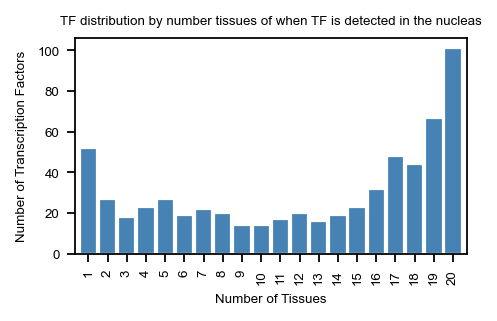

In [12]:
# Count unique tissues per gene
gene_tissue_counts = nuclearloc.groupby('gene_name')['Standardized_Tissue'].nunique()
# Get distribution: how many genes have X number of tissues
distribution = gene_tissue_counts.value_counts().sort_index()

# Plot
ax = distribution.plot(
    kind='bar',
    figsize=(3.0, 2.0),
    color='steelblue',
    width=0.9
)

# Axis labels and title
plt.xlabel('Number of Tissues')
plt.ylabel('Number of Transcription Factors')
plt.title('TF distribution by number tissues of when TF is detected in the nucleas')

plt.tight_layout()
#plt.savefig('/hpc/mydata/robert.jones/ProteinAtlas/Fig_AllSubcell.pdf')
plt.show()



In [13]:
gene_tissue_counts

gene_name
ADNP       16
AEBP1       2
AHDC1      13
AHR        17
AKAP8      20
           ..
ZSCAN18    17
ZSCAN2     20
ZSCAN29     8
ZSCAN30    17
ZSCAN31    17
Name: Standardized_Tissue, Length: 623, dtype: int64

In [14]:
# Get genes detected in exactly 1 tissue
genes_in_1_tissue = gene_tissue_counts[gene_tissue_counts == 1].index.tolist()

# Optional: display them
print(f"Number of genes detected in exactly 1 tissue: {len(genes_in_1_tissue)}")
print(genes_in_1_tissue)

Number of genes detected in exactly 1 tissue: 52
['BATF', 'BNC2', 'BPTF', 'DLX1', 'DMRT3', 'ESR1', 'ESX1', 'FIGLA', 'FLYWCH1', 'FOXJ1', 'FOXL2', 'FOXO4', 'FOXS1', 'GCM1', 'GFI1B', 'HNF4G', 'HOXA11', 'HSF5', 'KCMF1', 'KLF17', 'LHX1', 'MEF2B', 'MSANTD4', 'NFKB2', 'NKX2-1', 'NKX2-2', 'NKX3-1', 'NKX6-1', 'ONECUT1', 'PA2G4', 'PAX2', 'PAX9', 'PHOX2B', 'POU3F3', 'POU5F2', 'RFX2', 'RFX4', 'RHOXF2', 'RHOXF2B', 'SP7', 'TAL1', 'TCF15', 'YBX2', 'ZBED3', 'ZBTB18', 'ZBTB43', 'ZNF268', 'ZNF304', 'ZNF415', 'ZNF541', 'ZNF597', 'ZNF846']


In [15]:
# Get genes detected in exactly 1 tissue
genes_in_2_tissue = gene_tissue_counts[gene_tissue_counts == 2].index.tolist()

# Optional: display them
print(f"Number of genes detected in exactly 2 tissue: {len(genes_in_2_tissue)}")
print(genes_in_2_tissue)

Number of genes detected in exactly 2 tissue: 27
['AEBP1', 'ATF3', 'BARX2', 'BHLHE22', 'CDX1', 'CDX2', 'DMRTB1', 'EMX2', 'FAM170A', 'FOXP3', 'HSF2', 'IKZF4', 'PBX4', 'PHOX2A', 'POU2AF1', 'POU2F3', 'PROP1', 'RELA', 'RHOXF1', 'SALL4', 'SOX21', 'SOX30', 'TGIF2LX', 'ZFAT', 'ZNF112', 'ZNF219', 'ZNF337']


In [16]:
# Get genes detected in exactly 20 tissue
genes_in_20_tissue = gene_tissue_counts[gene_tissue_counts == 20].index.tolist()

# Optional: display them
print(f"Number of genes detected in exactly 20 tissue: {len(genes_in_20_tissue)}")
print(genes_in_20_tissue)

Number of genes detected in exactly 20 tissue: 101
['AKAP8', 'AKAP8L', 'ATF1', 'BRF2', 'CDC5L', 'CGGBP1', 'CHAMP1', 'CIC', 'CLOCK', 'CREB1', 'CTCF', 'E2F1', 'E4F1', 'ELF2', 'ETV5', 'FOXK1', 'FOXP2', 'GATA6', 'GLI2', 'GLYR1', 'GTF2I', 'HEY2', 'HIF3A', 'HMG20B', 'HMGA2', 'HOXA10', 'IRF2', 'IRF7', 'JUN', 'JUND', 'KDM2A', 'KDM5B', 'KMT2A', 'MECOM', 'MECP2', 'MEF2D', 'MEIS2', 'NCOA3', 'NFIA', 'NFIB', 'NFX1', 'NFYB', 'NKX3-2', 'NR3C1', 'NR5A2', 'PBX1', 'PKNOX2', 'POU5F1', 'POU6F1', 'RARG', 'RFX5', 'RFX7', 'RORA', 'RXRA', 'RXRB', 'SAFB', 'SETDB2', 'SIM2', 'SNAI1', 'SNAI2', 'SP1', 'SP3', 'SPEN', 'TBX2', 'TCF7L2', 'TET2', 'TFDP2', 'THAP11', 'THAP3', 'THYN1', 'TOPORS', 'TSHZ1', 'TSHZ3', 'USF1', 'WIZ', 'ZBTB44', 'ZBTB7A', 'ZFP91', 'ZNF131', 'ZNF148', 'ZNF207', 'ZNF22', 'ZNF282', 'ZNF3', 'ZNF346', 'ZNF384', 'ZNF44', 'ZNF443', 'ZNF521', 'ZNF540', 'ZNF544', 'ZNF579', 'ZNF609', 'ZNF630', 'ZNF703', 'ZNF707', 'ZNF75D', 'ZNF792', 'ZNF799', 'ZNF85', 'ZSCAN2']


In [17]:
xx = TFproDetTiss[TFproDetTiss.index == 'SON']
xx = xx[xx.location == 'nuclear']
xx.Standardized_Tissue.unique()

array(['Bone_Marrow', 'Mammary', 'Large_Intestine', 'Heart', 'Kidney',
       'Liver', 'Lung', 'Lymph_Node', 'Ovary', 'Pancreas', 'Prostate',
       'Salivary_Gland', 'Muscle', 'Skin', 'Small_Intestine', 'Spleen',
       'Stomach', 'Testis', 'Bladder'], dtype=object)

In [18]:
# Get genes detected in exactly 19 tissue
genes_in_19_tissue = gene_tissue_counts[gene_tissue_counts == 19].index.tolist()

# Optional: display them
print(f"Number of genes detected in exactly 19 tissue: {len(genes_in_19_tissue)}")
print(genes_in_19_tissue)

Number of genes detected in exactly 19 tissue: 67
['ARHGAP35', 'ARID5A', 'ATF2', 'ATF4', 'BBX', 'CEBPB', 'CUX1', 'CXXC1', 'ETV3', 'FOXO3', 'GATAD2B', 'GLIS3', 'GMEB1', 'GMEB2', 'GTF2B', 'HBP1', 'HMG20A', 'HOXA4', 'HOXA6', 'HSF1', 'IKZF2', 'KLF3', 'MAF', 'MAX', 'MBD1', 'MXD1', 'MYB', 'MYNN', 'MYSM1', 'NFIC', 'NFYA', 'PEG3', 'PPARA', 'PRDM5', 'REST', 'SAFB2', 'SALL1', 'SMAD4', 'SNAPC2', 'SON', 'SP2', 'TCF12', 'TCF3', 'TERF2', 'THRB', 'TTF1', 'XPA', 'YY1', 'ZBED4', 'ZBTB10', 'ZBTB12', 'ZBTB2', 'ZBTB37', 'ZBTB47', 'ZNF133', 'ZNF146', 'ZNF224', 'ZNF280C', 'ZNF354B', 'ZNF473', 'ZNF500', 'ZNF518B', 'ZNF559', 'ZNF687', 'ZNF768', 'ZNF777', 'ZNF830']


### Look at low 100

In [19]:
lowTausTFs = TFtaus.tail(100)
lowTaus = list(lowTausTFs.index)

In [20]:
lowTausTFs.tail() #just checking if it's the correct list.. 

,tau
ZNF644,0.459571
ASH1L,0.450371
YY1,0.434433
BPTF,0.432127
SON,0.400070


In [21]:
xx = nuclearloc.reset_index()
lownuclearloc = xx.loc[xx.gene_name.isin(lowTaus)]
lownuclearloc

,gene_name,ensembl_id,antibody_id,tissue,cell_type,staining,intensity,quantity,location,reliability_score,Standardized_Tissue
38,ZFX,ENSG00000005889,HPA001748,Bone marrow,Hematopoietic cells,medium,moderate,75%-25%,nuclear,supported,Bone_Marrow
39,ZFX,ENSG00000005889,HPA001748,Breast,Glandular cells,medium,moderate,>75%,nuclear,supported,Mammary
40,ZFX,ENSG00000005889,HPA001748,Breast,Myoepithelial cells,medium,moderate,>75%,nuclear,supported,Mammary
41,ZFX,ENSG00000005889,HPA001748,Colon,Endothelial cells,medium,moderate,>75%,nuclear,supported,Large_Intestine
42,ZFX,ENSG00000005889,HPA001748,Colon,Glandular cells,medium,moderate,>75%,nuclear,supported,Large_Intestine
...,...,...,...,...,...,...,...,...,...,...,...
17435,CUX1,ENSG00000257923,HPA003317,Skin 1,Fibroblasts,medium,moderate,>75%,"cytoplasmic/membranous,nuclear",approved,Skin
17436,CUX1,ENSG00000257923,HPA003317,Skin 1,Keratinocytes,medium,moderate,75%-25%,"cytoplasmic/membranous,nuclear",approved,Skin
17437,CUX1,ENSG00000257923,HPA003317,Skin 1,Langerhans,medium,moderate,>75%,nuclear,approved,Skin
17438,CUX1,ENSG00000257923,HPA003317,Skin 1,Melanocytes,medium,moderate,>75%,"cytoplasmic/membranous,nuclear",approved,Skin


In [22]:
len(lownuclearloc.gene_name.unique())

69

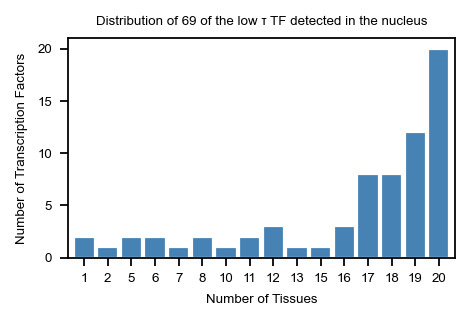

In [23]:
# Count unique tissues per gene
gene_tissue_counts = lownuclearloc.groupby('gene_name')['Standardized_Tissue'].nunique()

# Get distribution: how many genes have X number of tissues
distribution = gene_tissue_counts.value_counts().sort_index()

# Plot
ax = distribution.plot(
    kind='bar',
    figsize=(3.0, 2.0),
    color='steelblue',
    width=0.9
)

ax.tick_params(axis='x', labelrotation=0)

# Axis labels and title
plt.xlabel('Number of Tissues', fontsize = 6)
plt.ylabel('Number of Transcription Factors', fontsize = 6)
tit= 'Distribution of ' + str(len(lownuclearloc.gene_name.unique())) + ' of the low τ TF detected in the nucleus'
plt.title(tit, fontsize = 6)

plt.tight_layout()
plt.savefig(DATA_IN_DIR + 'Fig2D_Tiss_low_Subcell.pdf')
plt.show()



In [24]:
len(nuclearloc.index.unique())
nucdet = nuclearloc.index.unique()

In [25]:
lowtaunucdet = set(nucdet).intersection(set(lowTaus))
print(len(lowtaunucdet))
lowtaunucdet

69


{'ADNP',
 'AKAP8L',
 'ARNT',
 'ASH1L',
 'ATF1',
 'ATF4',
 'BBX',
 'BPTF',
 'CAMTA1',
 'CGGBP1',
 'CREB1',
 'CTCF',
 'CUX1',
 'EEA1',
 'ELF1',
 'ETV6',
 'FOS',
 'FOSL2',
 'FOXK2',
 'FOXN3',
 'GATAD2A',
 'GATAD2B',
 'GLYR1',
 'GPBP1',
 'GPBP1L1',
 'HBP1',
 'HIVEP1',
 'IRF2',
 'JUN',
 'JUND',
 'KCMF1',
 'KDM2A',
 'KLF3',
 'KLF6',
 'LCOR',
 'MECP2',
 'MEF2A',
 'NCOA1',
 'NFAT5',
 'NFE2L2',
 'NFX1',
 'NR1D2',
 'POU2F1',
 'RELA',
 'SAFB',
 'SAFB2',
 'SMYD3',
 'SON',
 'SP1',
 'SPEN',
 'STAT1',
 'STAT3',
 'TCF12',
 'TERF2',
 'YBX1',
 'YY1',
 'ZBTB17',
 'ZBTB20',
 'ZBTB44',
 'ZBTB7A',
 'ZFX',
 'ZNF131',
 'ZNF146',
 'ZNF24',
 'ZNF263',
 'ZNF37A',
 'ZNF384',
 'ZNF44',
 'ZNF800'}

In [26]:
## note:  69 of 72 low taus are nuclear detected!  

## compare to Anton's lists

In [27]:
all_scenic = list(pd.read_csv("/hpc/mydata/robert.jones/ProteinAtlas/scenic_tfs.txt", header=None).iloc[:,0])
len(all_scenic)

1390

In [28]:
active_scenic = list(pd.read_csv("/hpc/mydata/robert.jones/ProteinAtlas/scenic_active_tfs.txt", header=None).iloc[:,0])
len(active_scenic)

839

In [29]:
inactive_scenic = list(set(all_scenic) - set(active_scenic))
len(inactive_scenic)

551

In [30]:

print(len(set(active_scenic).intersection(set(lowtaunucdet))))
set(active_scenic).intersection(set(lowtaunucdet))

40


{'ARNT',
 'ATF1',
 'ATF4',
 'BPTF',
 'CREB1',
 'CTCF',
 'CUX1',
 'ELF1',
 'ETV6',
 'FOS',
 'FOSL2',
 'HBP1',
 'HIVEP1',
 'IRF2',
 'JUN',
 'JUND',
 'KLF3',
 'KLF6',
 'MECP2',
 'MEF2A',
 'NFAT5',
 'NFE2L2',
 'NR1D2',
 'POU2F1',
 'RELA',
 'SP1',
 'STAT1',
 'STAT3',
 'TCF12',
 'YBX1',
 'YY1',
 'ZBTB17',
 'ZBTB20',
 'ZBTB44',
 'ZBTB7A',
 'ZFX',
 'ZNF146',
 'ZNF263',
 'ZNF384',
 'ZNF44'}

In [31]:

print(len(set(inactive_scenic).intersection(set(lowtaunucdet))))
set(inactive_scenic).intersection(set(lowtaunucdet))

10


{'ADNP',
 'BBX',
 'FOXK2',
 'FOXN3',
 'KDM2A',
 'TERF2',
 'ZNF131',
 'ZNF24',
 'ZNF37A',
 'ZNF800'}

In [32]:
print(len(set(lowtaunucdet).difference(set(all_scenic))))
set(lowtaunucdet).difference(set(all_scenic))

19


{'AKAP8L',
 'ASH1L',
 'CAMTA1',
 'CGGBP1',
 'EEA1',
 'GATAD2A',
 'GATAD2B',
 'GLYR1',
 'GPBP1',
 'GPBP1L1',
 'KCMF1',
 'LCOR',
 'NCOA1',
 'NFX1',
 'SAFB',
 'SAFB2',
 'SMYD3',
 'SON',
 'SPEN'}